In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import random

import plotly.express as px

In [2]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

<Figure size 640x480 with 0 Axes>

### Read Data

In [3]:
laptop = pd.read_csv('laptop_clean.csv')

laptop.head()

,company,product,category,screen(inches),ram(GB),gpu,os,os_version,weight(kg),price,...,screentype,touchscreen,cpu_name,cpu_speed(GHz),cpu_brand,storage_1(GB),storage_2(GB),storage_1_type,storage_2_type,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,Mac OS,Mac OS,1.37,11912523.48,...,IPSPanelRetinaDisplay,0.0,Intel Core i5,2.3,Intel,128,0,SSD,NaN,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,Mac OS,Mac OS,1.34,7993374.48,...,NaN,0.0,Intel Core i5,1.8,Intel,128,0,Flash Storage,NaN,Intel
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,No OS,1.86,5112900.00,...,NaN,0.0,Intel Core i5 7200U,2.5,Intel,256,0,SSD,NaN,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,Mac OS,Mac OS,1.83,22563005.40,...,IPSPanelRetinaDisplay,0.0,Intel Core i7,2.7,Intel,512,0,SSD,NaN,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,Mac OS,Mac OS,1.37,16037611.20,...,IPSPanelRetinaDisplay,0.0,Intel Core i5,3.1,Intel,256,0,SSD,NaN,Intel


In [4]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            977 non-null    object 
 1   product            977 non-null    object 
 2   category           977 non-null    object 
 3   screen(inches)     977 non-null    float64
 4   ram(GB)            977 non-null    int64  
 5   gpu                977 non-null    object 
 6   os                 977 non-null    object 
 7   os_version         977 non-null    object 
 8   weight(kg)         977 non-null    float64
 9   price              977 non-null    float64
 10  resolution(pixel)  977 non-null    object 
 11  screentype         280 non-null    object 
 12  touchscreen        977 non-null    float64
 13  cpu_name           977 non-null    object 
 14  cpu_speed(GHz)     977 non-null    float64
 15  cpu_brand          977 non-null    object 
 16  storage_1(GB)      977 non

In [5]:
laptop['company'].value_counts()

Dell         232
Lenovo       226
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: company, dtype: int64

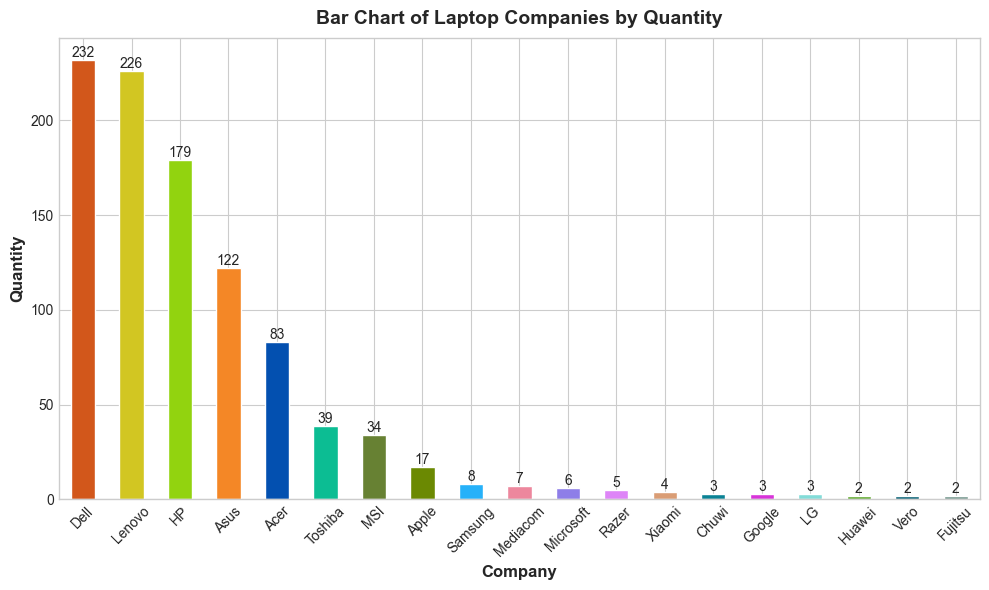

In [6]:
jumlah_company = laptop['company'].value_counts()

colors = ['#'+''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(jumlah_company))]

plt.figure(figsize=(10, 6))
ax = jumlah_company.plot(kind='bar', color = colors)
plt.title("Bar Chart of Laptop Companies by Quantity")
plt.xlabel('Company')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

The bar chart showcases the distribution of laptop products among different companies. Dell and Lenovo emerge as the top contenders, with a high number of laptop models. HP also holds a significant share in the market. Asus, Acer, and other companies follow suit with a comparatively smaller number of laptop models.

This visualization provides a snapshot of the competitive landscape in the laptop industry. It highlights the dominance of leading brands like Dell, Lenovo, and HP, while also showcasing the presence of other manufacturers offering a range of options for consumers.

In [7]:
laptop['category'].value_counts()

Notebook              549
Ultrabook             152
Gaming                150
2 in 1 Convertible     85
Workstation            24
Netbook                17
Name: category, dtype: int64

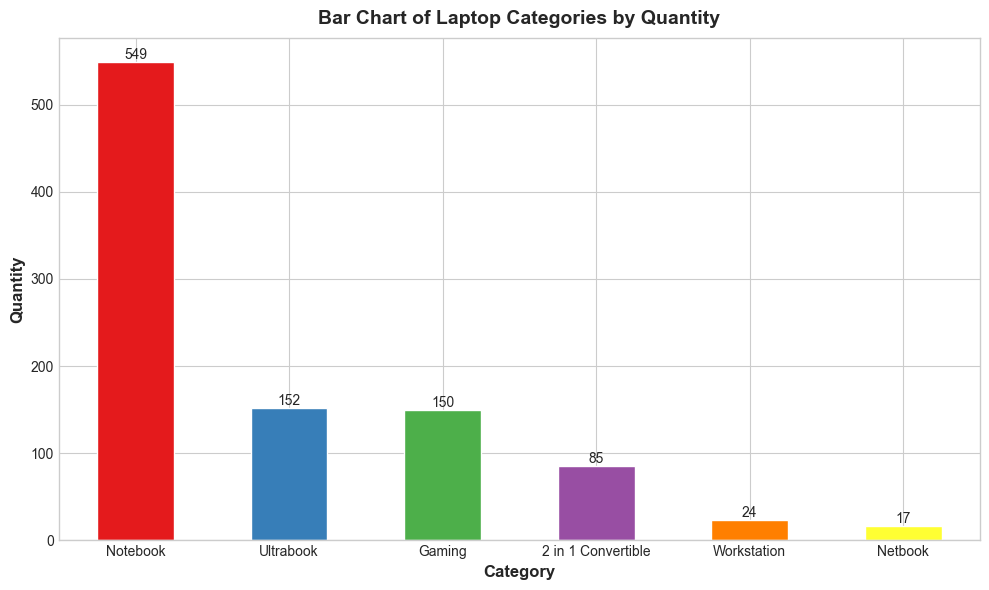

In [8]:
jumlah_kategori = laptop['category'].value_counts()

colors = sns.color_palette('Set1', len(jumlah_kategori))

plt.figure(figsize=(10, 6))
ax = jumlah_kategori.plot(kind='bar', color=colors)
plt.title('Bar Chart of Laptop Categories by Quantity')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

The bar chart showcases the distribution of laptop products across different categories. Notebooks have the highest count, followed by ultrabooks and gaming laptops. 2-in-1 convertibles, workstations, and netbooks complete the range of laptop types.

This visualization provides an overview of the laptop category distribution, highlighting the popularity of notebooks and the emergence of ultrabooks and gaming laptops. It also showcases the presence of versatile 2-in-1 convertibles, specialized workstations, and compact netbooks.

In [9]:
laptop['ram(GB)'].value_counts()

8     483
4     271
16    149
6      24
12     21
32     16
2      10
24      3
Name: ram(GB), dtype: int64

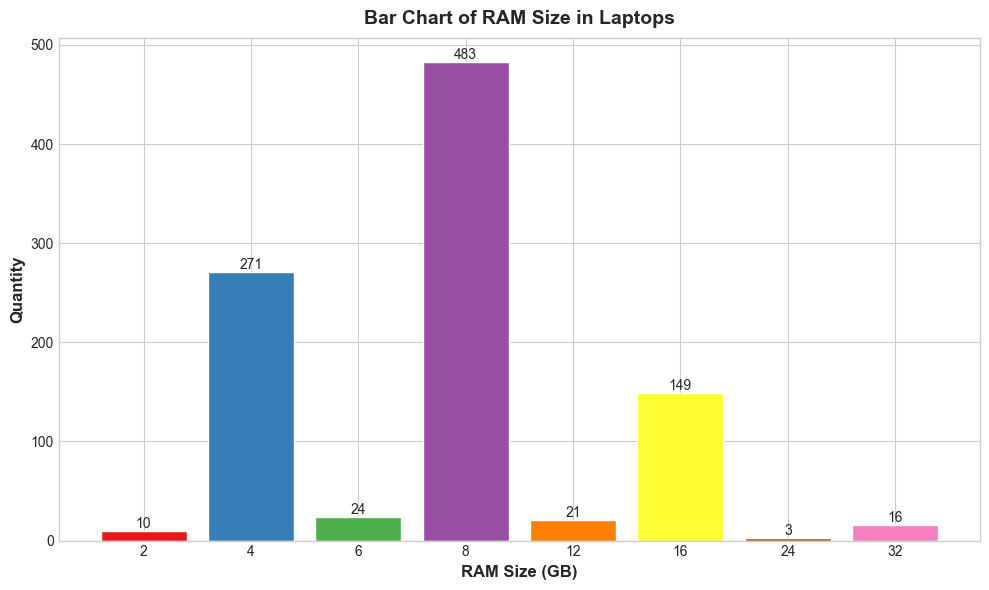

In [10]:
besar_ram = laptop['ram(GB)'].value_counts()
besar_ram = besar_ram.sort_index()

colors = sns.color_palette('Set1', len(besar_ram))

plt.figure(figsize=(10, 6))
plt.bar(range(len(besar_ram)), besar_ram.values, color=colors)
plt.title("Bar Chart of RAM Size in Laptops")
plt.xlabel('RAM Size (GB)')
plt.ylabel('Quantity')
plt.xticks(range(len(besar_ram)), besar_ram.index)
for i, v in enumerate(besar_ram.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()


The bar chart displays the distribution of laptop products based on the size of RAM (in GB). Laptops with 8GB RAM are the most prevalent, followed by those with 4GB and 16GB RAM. Other RAM sizes, such as 6GB, 12GB, 32GB, 2GB, and 24GB, have a smaller representation.

This visualization provides an overview of the RAM distribution in laptops, highlighting the popularity of 8GB and 4GB RAM configurations. It also showcases the availability of higher RAM capacities for users with more demanding computing needs.

In [12]:
laptop['screen(inches)'].value_counts()

15.6    494
14.0    146
17.3    131
13.3    123
11.6     27
12.5     23
13.5      6
13.9      6
15.4      4
12.3      4
12.0      3
15.0      3
13.0      2
10.1      1
18.4      1
17.0      1
14.1      1
11.3      1
Name: screen(inches), dtype: int64

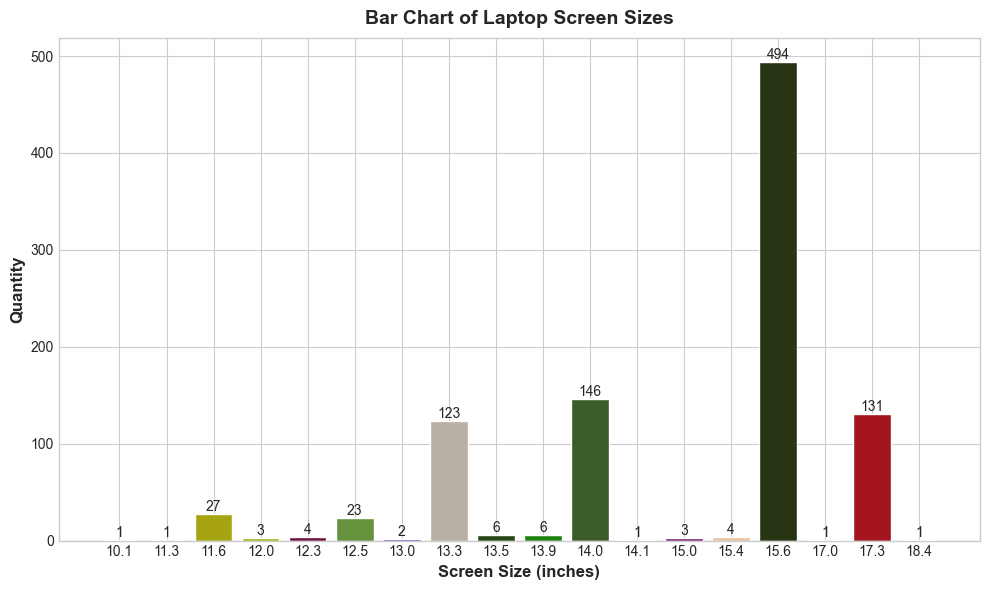

In [13]:
jumlah_screen = laptop['screen(inches)'].astype(str).value_counts()
jumlah_screen = jumlah_screen.sort_index()

colors = ['#'+''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(jumlah_company))]

plt.figure(figsize=(10, 6))
plt.bar(jumlah_screen.index, jumlah_screen.values, color = colors)
plt.title("Bar Chart of Laptop Screen Sizes")
plt.xlabel('Screen Size (inches)')
plt.ylabel('Quantity')
for i, v in enumerate(jumlah_screen.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

The bar chart illustrates the distribution of laptop products based on screen size (in inches). The most common screen size is 15.6 inches, followed by 14.0 and 17.3 inches. Smaller and larger screen sizes have a smaller representation.

This visualization provides an overview of the screen size distribution, highlighting the popularity of mid-sized screens that offer a balance between portability and a comfortable viewing experience.

In [14]:
laptop['gpu'].value_counts()

Intel HD Graphics 620             225
Intel HD Graphics 520              98
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            57
AMD Radeon 530                     37
                                 ... 
Nvidia GeForce GTX 960<U+039C>      1
Intel Graphics 620                  1
Nvidia GeForce GTX 960              1
AMD Radeon R5 520                   1
AMD Radeon R9 M385                  1
Name: gpu, Length: 98, dtype: int64

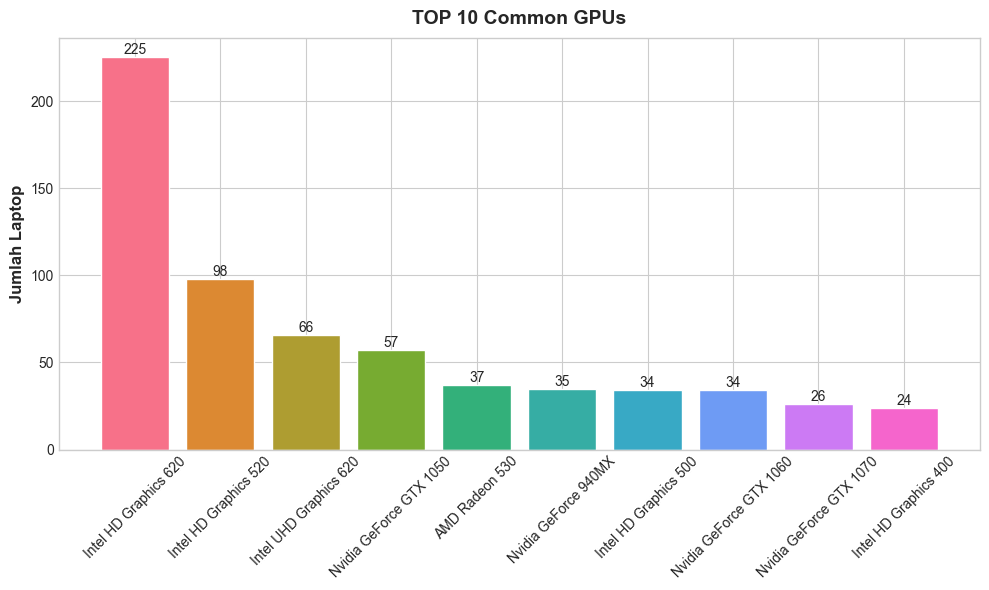

In [15]:
gpu_list = laptop['gpu'].value_counts()[:10].index.tolist()

data = laptop.copy()
data = data[data['gpu'].isin(gpu_list)]

grouped_gpu = data.groupby('gpu').size().reset_index(name='counts')

grouped_gpu = grouped_gpu.sort_values(by='counts', ascending=False)

colors = sns.color_palette('husl', len(grouped_gpu))

plt.figure(figsize=(10, 6))
plt.bar(grouped_gpu['gpu'], grouped_gpu['counts'], color=colors)
plt.title("TOP 10 Common GPUs")
plt.xticks(rotation = 45)
plt.ylabel('Jumlah Laptop')

for i, v in enumerate(grouped_gpu['counts']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


The bar chart illustrates the distribution of the top 10 common GPUs among laptops. The most prevalent GPU is Intel HD Graphics 620, followed by Intel HD Graphics 520 and Intel UHD Graphics 620. Nvidia GeForce GPUs also have a strong presence in the top 10.

This visualization highlights the popularity of integrated graphics solutions, such as Intel HD Graphics, which are commonly found in laptops for everyday tasks. It also showcases the presence of dedicated GPUs, particularly from Nvidia, catering to users seeking enhanced gaming and multimedia experiences.

In [16]:
laptop['gpu_brand'].value_counts()

Intel     525
Nvidia    310
AMD       142
Name: gpu_brand, dtype: int64

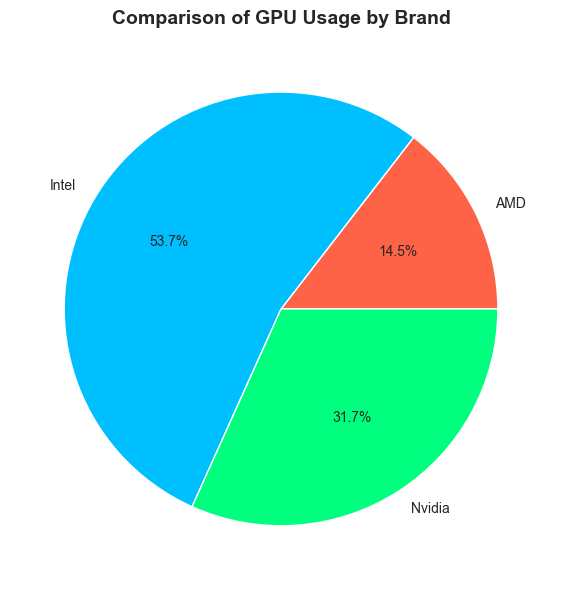

In [17]:
gpu_brand = laptop.groupby(['gpu_brand']).size().reset_index(name='counts')
plt.figure(figsize=(10, 6))
color = ['#FF6347', '#00BFFF', '#00FF7F']

plt.pie(gpu_brand['counts'], labels=gpu_brand['gpu_brand'], autopct='%1.1f%%', colors=color)
plt.title('Comparison of GPU Usage by Brand')
plt.show()

The pie chart illustrates the distribution of laptop GPU brands based on the percentage of laptops using each brand. Intel leads the market with 53.7% of laptops using Intel GPUs, followed by Nvidia with 31.7% and AMD with 14.5%.

This visualization highlights Intel's dominance in the GPU market, offering integrated graphics solutions that are widely adopted for everyday tasks. Nvidia and AMD also hold significant shares, catering to users seeking dedicated GPUs for gaming and multimedia experiences.

In [18]:
laptop['os'].value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
Mac OS        17
Android        1
Name: os, dtype: int64

In [19]:
grouped_os = laptop.groupby('os').size().reset_index(name = 'counts')
fig = px.pie(grouped_os, values = 'counts', names = 'os', labels={'counts': 'Jumlah Laptop'}, title='Proportion of Laptops by Operating System')
fig.update_layout(
    width= 750,
    height = 600
)
fig.show()

The pie chart represents the distribution of laptop operating systems (OS) based on the percentage of laptops using each OS. Windows dominates the market with 85.7% of laptops running on this OS, followed by No OS at 5.3%, Linux at 4.9%, Chrome OS at 2.3%, Mac OS at 1.7%, and Android at 0.1%.

This visualization highlights the popularity of Windows as the most widely used OS in laptops, known for its user-friendly interface and software compatibility. Other operating systems, such as Linux, Chrome OS, Mac OS, and Android, cater to specific user preferences and requirements.

In [20]:
laptop['os_version'].value_counts()

Windows 10      819
No OS            52
Linux            48
Chrome OS        22
Mac OS           13
Windows 7        10
Windows 10 S      8
Mac OS X          4
Android           1
Name: os_version, dtype: int64

In [21]:
laptop.groupby('os')['os_version'].value_counts()

os         os_version  
Android    Android           1
Chrome OS  Chrome OS        22
Linux      Linux            48
Mac OS     Mac OS           13
           Mac OS X          4
No OS      No OS            52
Windows    Windows 10      819
           Windows 7        10
           Windows 10 S      8
Name: os_version, dtype: int64

In [22]:
grouped_os_version = laptop.groupby(['os_version', 'os']).size().reset_index(name= 'counts')

fig = px.bar(grouped_os_version, x = 'os', y = 'counts', color = 'os_version', text = "counts", labels = {'counts': 'Count'}, title= 'Laptop Count by Operating System and Version')
fig.update_layout(width = 750, height = 600)
fig.show()

The bar chart illustrates the distribution of laptop operating systems (OS) and their respective versions. It showcases the number of laptops running each OS version.

Windows 10 is the most prevalent OS version, with 819 laptops running on it. No OS is the second most common category, indicating laptops that do not come with a pre-installed operating system. Linux and Chrome OS have a moderate presence, with 48 and 22 laptops respectively. Mac OS, including both Mac OS and Mac OS X versions, accounts for a total of 17 laptops. Other Windows versions, such as Windows 7 and Windows 10 S, have a smaller representation.

This visualization helps us understand the diverse landscape of laptop operating systems and their versions. Windows 10 emerges as the dominant choice, reflecting its widespread usage and popularity. Additionally, the presence of alternative OS options like Linux, Chrome OS, and Mac OS provides users with different software ecosystems to choose from based on their preferences and requirements.

In [23]:
laptop['weight(kg)'].value_counts()

2.20    99
2.10    45
2.00    40
2.50    32
2.40    27
        ..
1.94     1
4.60     1
4.50     1
2.29     1
2.75     1
Name: weight(kg), Length: 160, dtype: int64

In [24]:
laptop['weight(kg)'].describe()

count    977.000000
mean       2.039128
std        0.666009
min        0.690000
25%        1.500000
50%        2.020000
75%        2.300000
max        4.700000
Name: weight(kg), dtype: float64

In [25]:
fig = px.histogram(laptop, x = 'weight(kg)', title='Distribution of Laptop Weights', marginal='box', color_discrete_sequence=['#FFA500'], nbins = 10)
fig.update_layout(width = 750, height = 600)
fig.show()

The histogram visualizes the distribution of laptop weights in kilograms (kg). It shows the frequency or count of laptops within different weight ranges. The data suggests that most laptops fall within the range of 1.5 kg to 2.3 kg, with a mean weight of 2.04 kg and a standard deviation of 0.67 kg.

This histogram provides a quick overview of the weight distribution, allowing users to understand the typical weight ranges of laptops. It can help inform decisions regarding portability and personal preferences when selecting a laptop.

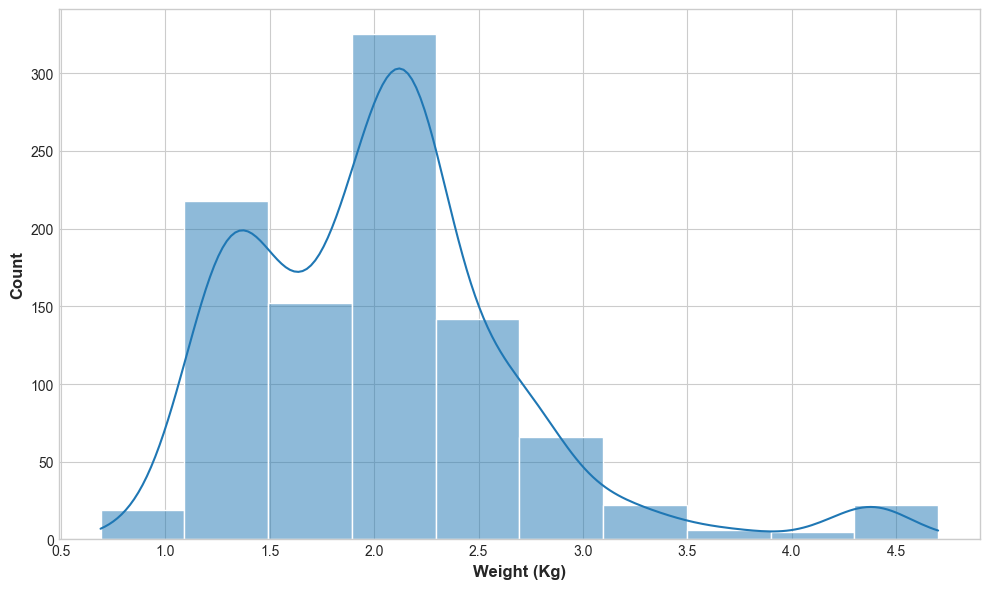

In [26]:
plt.figure(figsize=(10, 6))

sns.histplot(data=laptop, x = 'weight(kg)', kde=True, bins = 10)
plt.xlabel('Weight (Kg)')

plt.tight_layout()
plt.show()

In [27]:
laptop['resolution(pixel)'].value_counts()

1920x1080    655
1366x768     206
3840x2160     36
1600x900      19
3200x1800     15
2560x1440     15
2560x1600      6
2256x1504      6
1440x900       4
2880x1800      4
2304x1440      3
2400x1600      3
1920x1200      2
2160x1440      2
2736x1824      1
Name: resolution(pixel), dtype: int64

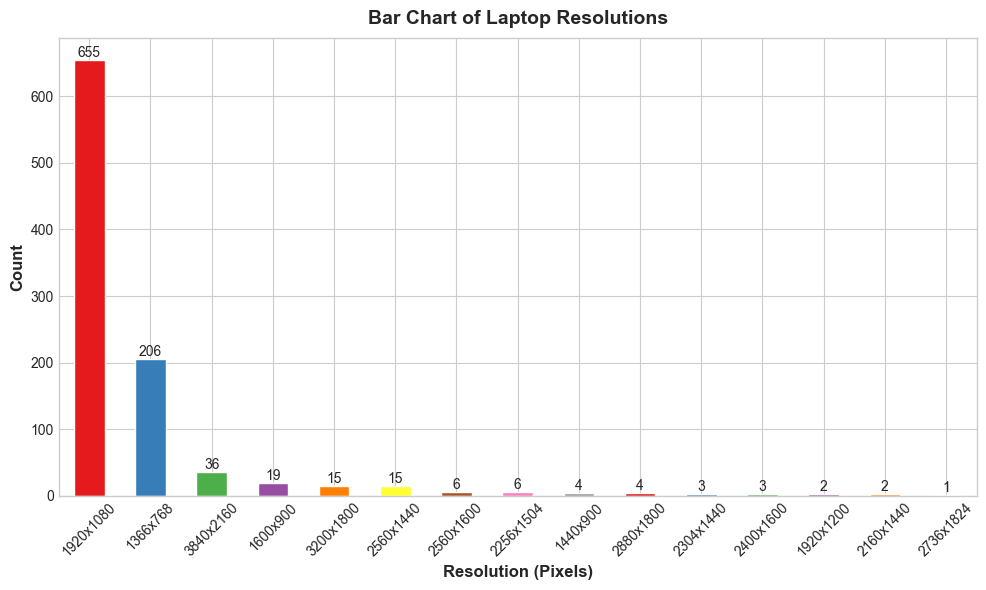

In [28]:
resolusi = laptop['resolution(pixel)'].value_counts()

colors = sns.color_palette('Set1', len(resolusi))

plt.figure(figsize=(10,  6))
ax = resolusi.plot(kind = 'bar', color = colors)
plt.title("Bar Chart of Laptop Resolutions")
plt.xlabel('Resolution (Pixels)')
plt.ylabel('Count')
plt.xticks(rotation = 45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

plt.show()

The bar chart visualizes the distribution of laptop resolutions based on the number of laptops with each resolution. The most common resolution is 1920x1080, with 655 laptops, followed by 1366x768 with 206 laptops and 3840x2160 with 36 laptops. Other resolutions such as 1600x900, 3200x1800, and 2560x1440 have smaller counts ranging from 15 to 19 laptops.

This visualization provides an overview of the screen resolution preferences among the laptops in the dataset. It showcases the dominance of Full HD (1920x1080) resolution, which is widely adopted in the laptop market. Other resolution sizes cater to specific user requirements, such as higher pixel density for professional or multimedia use.

In [29]:
grouped_resolusi = laptop.groupby(['resolution(pixel)']).size().reset_index(name = 'counts')
grouped_resolusi = grouped_resolusi.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_resolusi, x = 'resolution(pixel)', y = 'counts', color = 'resolution(pixel)', labels={'counts': 'Jumlah Laptop'}, title= 'Jumlah Laptop Berdasarkan Resolusi (pixel)')

fig.update_layout(width = 750, height = 600)

fig.show()

In [30]:
laptop['screentype'].value_counts()

IPSPanel                 266
IPSPanelRetinaDisplay     14
Name: screentype, dtype: int64

In [31]:
laptop['screentype']

0      IPSPanelRetinaDisplay
1                        NaN
2                        NaN
3      IPSPanelRetinaDisplay
4      IPSPanelRetinaDisplay
               ...          
972                      NaN
973                      NaN
974                      NaN
975                 IPSPanel
976                      NaN
Name: screentype, Length: 977, dtype: object

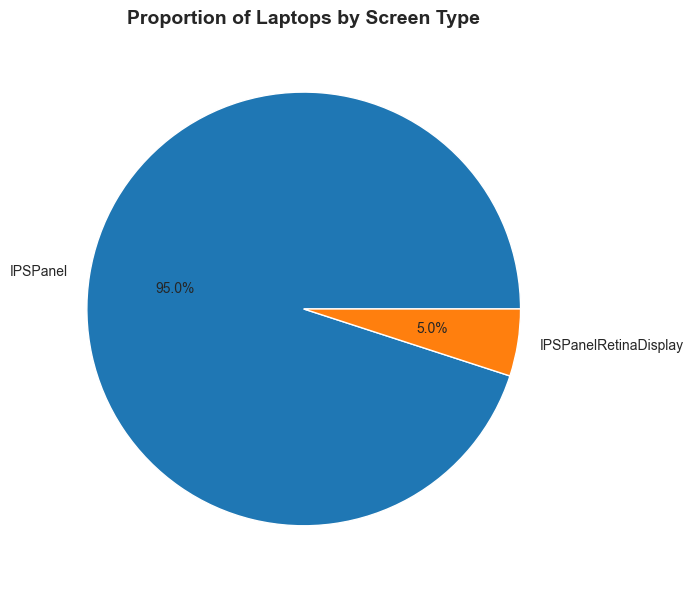

In [32]:
grouped_screentype = laptop.groupby('screentype').size().reset_index(name = 'counts')
plt.figure(figsize=(10, 6))

plt.pie(grouped_screentype['counts'], labels=grouped_screentype['screentype'], autopct='%1.1f%%')
plt.title('Proportion of Laptops by Screen Type')
plt.show()

The pie chart illustrates the distribution of laptop screen types based on the percentage of laptops using each type. The majority of laptops in the dataset utilize an IPS Panel screen, accounting for 95.0% of the total, while laptops with an IPS Panel Retina Display make up the remaining 5.0%.

This visualization highlights the dominance of IPS Panel screens in the laptop market, known for their superior color reproduction and wide viewing angles. IPS Panel Retina Display, on the other hand, is a more specialized screen type known for its high pixel density and sharp image quality.

It's worth noting that the provided data might not cover all laptops in the dataset since the total count is less than 977. However, based on the available data, we can still observe the distribution of screen types.

In [33]:
laptop['touchscreen'].value_counts()

0.0    836
1.0    141
Name: touchscreen, dtype: int64

In [34]:
laptop['touchscreen'] = laptop['touchscreen'].astype(str)

laptop['touchscreen'] = laptop['touchscreen'].str.replace('0.0', "Non-Touchscreen")
laptop['touchscreen'] = laptop['touchscreen'].str.replace('1.0', 'Touchscreen')

laptop['touchscreen'].unique()

array(['Non-Touchscreen', 'Touchscreen'], dtype=object)

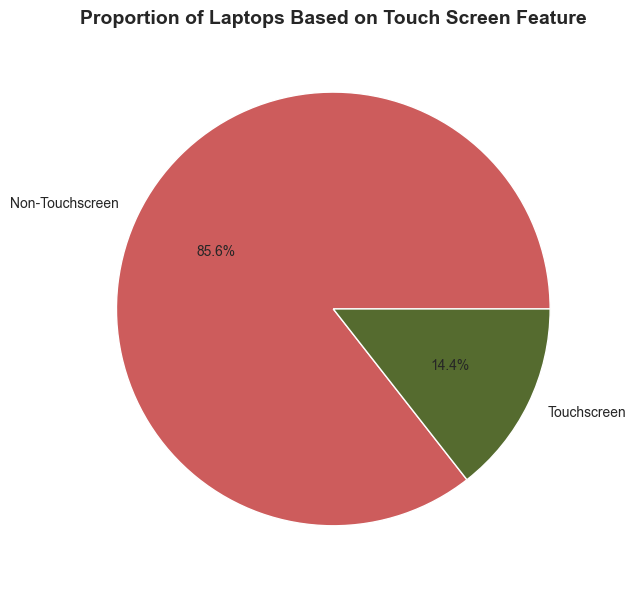

In [35]:
touchscreen = laptop.groupby('touchscreen').size().reset_index(name="counts")
plt.figure(figsize=(10, 6))

colors = ['#CD5C5C', '#556B2F']
plt.pie(touchscreen['counts'], labels=touchscreen['touchscreen'], autopct='%1.1f%%', colors=colors)
plt.title('Proportion of Laptops Based on Touch Screen Feature')
plt.show()


The pie chart displays the distribution of laptops based on their touchscreen capability. Among the laptops in the dataset, the majority (85.6%) do not have touchscreen support, while a smaller portion (14.4%) are equipped with touchscreen functionality.

This visualization highlights that touchscreen laptops are not as prevalent as non-touchscreen laptops in the dataset. Non-touchscreen laptops are more commonly used, offering traditional input methods like keyboards and trackpads. On the other hand, touchscreen laptops provide a more interactive and intuitive user experience, allowing users to directly interact with the screen.

In [36]:
laptop['cpu_name'].value_counts()

Intel Core i5 7200U     153
Intel Core i7 7700HQ    124
Intel Core i7 7500U     104
Intel Core i7 8550U      71
Intel Core i5 8250U      71
                       ... 
Intel Core M m3           1
Intel Core i5 6440HQ      1
Intel Core M m3-7Y30      1
AMD E-Series 7110         1
Intel Core M M7-6Y75      1
Name: cpu_name, Length: 85, dtype: int64

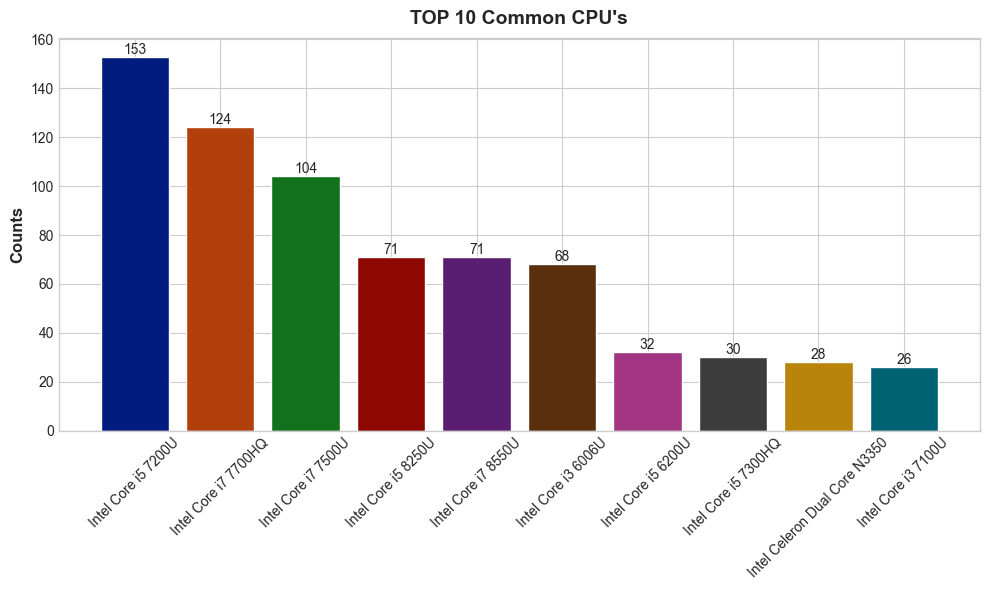

In [37]:
cpu_list = laptop['cpu_name'].value_counts()[:10].index.tolist()

data = laptop.copy()
data = data[data['cpu_name'].isin(cpu_list)]

grouped_cpu = data.groupby('cpu_name').size().reset_index(name='counts')

grouped_cpu = grouped_cpu.sort_values(by='counts', ascending=False)

colors = sns.color_palette('dark', len(grouped_cpu))

plt.figure(figsize=(10, 6))
plt.bar(grouped_cpu['cpu_name'], grouped_cpu['counts'], color=colors)
plt.title("TOP 10 Common CPU's")
plt.xticks(rotation = 45)
plt.ylabel('Counts')

for i, v in enumerate(grouped_cpu['counts']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


The bar chart represents the distribution of the top 10 common GPUs in the dataset based on the number of laptops that have each GPU. The most common GPU is "Intel Core i5 7200U" with 153 laptops, followed by "Intel Core i7 7700HQ" with 124 laptops, and "Intel Core i7 7500U" with 104 laptops.

This visualization highlights the popularity of Intel Core processors, particularly the i5 and i7 series, among the laptops in the dataset. These processors offer a balance of performance and power efficiency, making them suitable for various tasks ranging from everyday computing to demanding applications.

In [38]:
laptop['cpu_speed(GHz)'].value_counts()

2.50    213
2.80    142
2.70    127
1.60    109
1.80     75
2.00     70
1.10     46
2.30     40
2.60     34
2.40     32
2.90     18
3.00     18
1.20     11
2.20      8
1.44      7
1.50      7
1.30      5
3.10      3
3.60      3
2.10      3
1.90      2
3.20      1
1.00      1
0.90      1
1.92      1
Name: cpu_speed(GHz), dtype: int64

In [39]:
cpu_speed = laptop.groupby('cpu_speed(GHz)').size().reset_index(name='counts')
cpu_speed['cpu_speed(GHz)'] = cpu_speed['cpu_speed(GHz)'].astype(str)

fig = px.bar(cpu_speed, x = 'cpu_speed(GHz)', y = 'counts', color = 'cpu_speed(GHz)', labels = {'counts': 'Counts'}, title='Laptop Count by CPU Speed(GHz)', barmode = 'stack')

fig.update_layout(
    width = 750,
    height = 750,
    xaxis = dict(
        tickmode = 'array',
        tickvals = cpu_speed['cpu_speed(GHz)'].unique(),
        ticktext = cpu_speed['cpu_speed(GHz)'].unique()
    )
)

fig.show()

The bar chart represents the distribution of the number of laptops based on CPU speed (GHz). The most common CPU speed among the laptops in the dataset is 2.50 GHz with 213 laptops, followed by 2.80 GHz with 142 laptops, and 2.70 GHz with 127 laptops.

This visualization highlights the various CPU speeds available in laptops, ranging from lower speeds like 0.90 GHz and 1.00 GHz to higher speeds like 3.20 GHz and 3.60 GHz. The choice of CPU speed depends on individual preferences and specific computing needs. The distribution highlights the popularity of certain CPU speeds, indicating the market demand for specific performance levels. Higher CPU speeds generally offer faster processing and better performance for tasks that require intensive computations, such as gaming or video editing.

In [40]:
laptop['cpu_brand'].value_counts()

Intel    929
AMD       48
Name: cpu_brand, dtype: int64

In [41]:
cpu_brand = laptop.groupby('cpu_brand').size().reset_index(name='counts')

fig = px.pie(cpu_brand, values = "counts", names = 'cpu_brand', color = 'cpu_brand', labels = {'counts': 'Jumlah Laptop'}, title = 'Proportion of Laptops by CPU Brand', color_discrete_sequence=["#FF6347", "#4169E1"])
fig.update_layout(width = 750, height = 600)

fig.show()

The pie chart shows the distribution of laptop brands based on the percentage of laptops using each CPU brand. Intel dominates the market with 95.1% or 929 laptops equipped with Intel CPUs, while AMD only accounts for 4.9% or 48 of the laptops in the dataset.

This visualization highlights the overwhelming presence of Intel as the leading CPU brand in the laptop market. Intel processors are widely recognized for their performance, power efficiency, and compatibility with a wide range of software applications. On the other hand, AMD, although representing a smaller portion, offers competitive alternatives with their processors known for their strong multi-core performance and value for money.

In [42]:
laptop['storage_1(GB)'].value_counts()

256     388
1000    186
128     140
512     109
500      79
32       35
2000     14
64       11
16        8
1         4
240       1
8         1
508       1
Name: storage_1(GB), dtype: int64

In [43]:
grouped_storage_1 = laptop.groupby('storage_1(GB)').size().reset_index(name='counts')
grouped_storage_1['storage_1(GB)'] = grouped_storage_1['storage_1(GB)'].astype(str)

fig = px.bar(grouped_storage_1, x = 'storage_1(GB)', y = 'counts', color = 'storage_1(GB)', labels={'counts': 'Counts'}, title="Laptop Count by Primary Storage Capacity")

fig.update_layout(
    width = 750,
    height = 600
)

fig.show()

The bar chart represents the distribution of laptops based on the storage capacity of the primary storage (Storage 1). The most common storage capacity is 256 GB, accounting for 37.4% of the laptops in the dataset, followed by 1000 GB (18.0%), 128 GB (13.6%), and 512 GB (10.6%).

This visualization highlights the popularity of laptops with moderate storage capacities. The presence of laptops with 256 GB and 512 GB suggests that these capacities strike a balance between storage needs and affordability for many users. Additionally, the significant number of laptops with 1000 GB storage reflects the demand for larger storage capacities to accommodate extensive file storage and multimedia content.

It's worth noting that there are laptops with smaller storage capacities, such as 32 GB, 16 GB, and even 1 GB, which could indicate their usage as lightweight devices or specialized systems for specific purposes. On the other hand, laptops with higher storage capacities like 2000 GB (2 TB) cater to users with substantial storage requirements, such as professionals working with large datasets or multimedia creators.

In [44]:
laptop['storage_1_type'].value_counts()

SSD              653
HDD              267
Flash Storage     55
Hybrid             2
Name: storage_1_type, dtype: int64

In [45]:
grouped_storage_1_type = laptop.groupby('storage_1_type').size().reset_index(name='counts')

fig = px.pie(grouped_storage_1_type, names = 'storage_1_type', values = 'counts', labels={'counts': 'Jumlah Laptop'}, title='Proportion of Laptops by Types of Primary Storage ')
fig.update_layout(width = 750, height = 600)

fig.show()

The pie chart represents the distribution of laptops based on the type of primary storage (Storage 1) used. The majority of laptops in the dataset utilize SSD (Solid State Drive) as their primary storage, accounting for 66.8% of the laptops. HDD (Hard Disk Drive) is the second most common storage type, comprising 27.3% of the laptops. There are also a smaller percentage of laptops using Flash Storage (5.63%) and Hybrid storage (0.205%).

This visualization highlights the shift towards SSDs as the preferred storage type for laptops. SSDs offer faster data access, improved performance, and greater reliability compared to traditional HDDs. The dominance of SSDs in the market is a result of their advantages in terms of speed, durability, and power efficiency. However, it's worth noting that there are still laptops using HDDs, which provide larger storage capacities at a lower cost. HDDs are commonly found in budget-oriented laptops or laptops where storage capacity is prioritized over speed.

The presence of a smaller percentage of laptops using Flash Storage and Hybrid storage indicates that these storage technologies are utilized in specific laptop models or cater to niche user requirements. Flash Storage, also known as eMMC (Embedded MultiMediaCard), offers a balance between cost and performance, often found in entry-level or lightweight laptops. Hybrid storage combines the advantages of both SSD and HDD technologies, providing a combination of speed and ample storage capacity.

In [46]:
laptop['storage_2(GB)'].value_counts()

0       818
1000    140
2000     14
256       3
500       1
512       1
Name: storage_2(GB), dtype: int64

In [47]:
grouped_storage_2 = laptop.groupby('storage_2(GB)').size().reset_index(name='counts')
grouped_storage_2['storage_2(GB)'] = grouped_storage_2['storage_2(GB)'].astype(str)

fig = px.bar(grouped_storage_2, x = 'storage_2(GB)', y = 'counts', color = 'storage_2(GB)', labels={'counts': 'Count'}, title="Laptop Count by Additional Storage Capacity")

fig.update_layout(
    width = 750,
    height = 600
)

fig.show()

The bar chart represents the distribution of laptops based on the capacity of the additional storage (Storage 2) used. It is worth noting that a significant portion of laptops, specifically 818 out of the total, do not have any additional storage, indicated by 0 GB. These laptops likely rely solely on their primary storage (Storage 1) for data storage needs.

Of the laptops that have additional storage, 1000 GB is the most common capacity, indicating the users' tendency to opt for an extra 1TB of storage to supplement their primary storage. Additionally, there are a smaller number of laptops with even higher additional storage capacities of 2000 GB (2TB), suggesting a preference for larger storage options.

A few laptops have relatively smaller additional storage capacities, such as 256 GB, 500 GB, and 512 GB. These capacities likely cater to specific user requirements, such as those who need a moderate amount of extra storage for specific purposes. The significant presence of laptops without additional storage suggests that many users find the primary storage capacity sufficient for their needs. However, for those who require extra storage, 1TB is the most popular choice.

In [48]:
laptop['storage_2_type'].value_counts()

HDD    155
SSD      4
Name: storage_2_type, dtype: int64

In [49]:
grouped_storage_2_type = laptop.groupby('storage_2_type').size().reset_index(name='counts')

fig = px.pie(grouped_storage_2_type, names='storage_2_type', values='counts', labels={'counts': 'Number of Laptops'}, title='Proportion of Laptops by Types of Additional Storage', color_discrete_sequence=["#8FBC8F", "#E9967A"])
fig.update_layout(
    width=750,
    height=600
)
fig.show()

The pie chart represents the distribution of laptops based on the type of additional storage (Storage 2) used. It's important to note that a significant number of laptops, specifically those without additional storage, are not included in this visualization.

Among the laptops with additional storage, the majority, accounting for 97.4% of the laptops, utilize HDD (Hard Disk Drive) as their storage type. HDDs are known for providing larger storage capacities at a more affordable price point, making them a popular choice for users who require ample storage space. A smaller proportion of laptops, representing only 2.6% of the laptops with additional storage, use SSD (Solid State Drive) as their storage type. SSDs offer faster data access and improved performance compared to HDDs but tend to have relatively smaller storage capacities.

This insight emphasizes the prevalence of HDDs as the primary choice for additional storage among laptops. While SSDs offer advantages in terms of speed and performance, HDDs remain popular due to their larger storage capacities and more budget-friendly pricing. When considering a laptop's storage options, users should assess their storage needs and consider factors such as capacity, performance, and cost. HDDs are well-suited for users requiring ample storage space, while SSDs are beneficial for those seeking faster data access and performance.

In [50]:
data['price'].max()

32539384.8

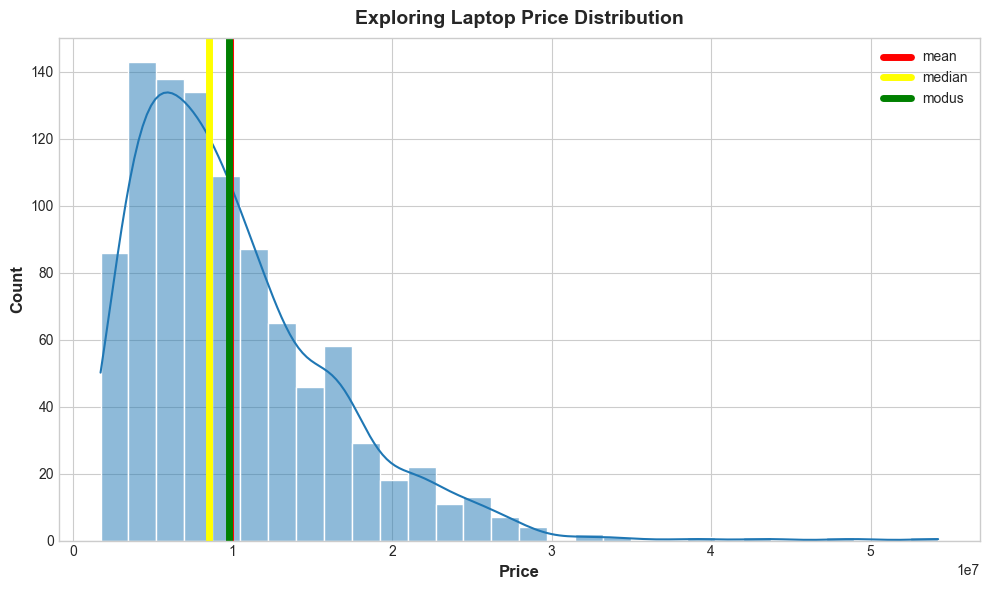

In [51]:
plt.figure(figsize=(10, 6))

sns.histplot(data=laptop, x = 'price', kde=True, bins = 30)
plt.xlabel('Price')
plt.axvline(data['price'].describe()['mean'], color = 'red', linewidth=5, label='mean')
plt.axvline(data['price'].describe()['50%'], color = 'yellow', linewidth=5, label = 'median')
plt.axvline(data['price'].mode()[0], color = 'green', linewidth=5, label = 'modus')

plt.title("Exploring Laptop Price Distribution")
plt.tight_layout()
plt.legend()

The histogram represents the distribution of laptop prices. It shows a normal distribution with a single peak, indicating that most laptops fall within a specific price range. The range of prices varies from 1,804,186.8 to 32,539,384.8, and the histogram is divided into 30 bins to provide a detailed view of the price distribution.

The distribution has positive skewness, meaning that the tail of the distribution extends towards higher values. This is reflected in the order of measures - median, mode, and mean - where the mean is higher than the median, and the mode represents the most frequent price value.

The dataset consists of 707 laptop entries, with a mean price of approximately 9,797,242 and a standard deviation of 5,318,692. The quartile values (25th, 50th, and 75th percentiles) provide insights into the spread of prices. There don't appear to be any outliers, indicating a relatively consistent range of laptop prices within the dataset.

The histogram visualization allows users to understand the distribution of laptop prices, identify the most common price range, and observe the skewness of the data.

In [52]:
laptop.describe()

,screen(inches),ram(GB),weight(kg),price,cpu_speed(GHz),storage_1(GB),storage_2(GB)
count,977.00000,977.000000,977.000000,9.770000e+02,977.000000,977.000000,977.000000
mean,15.05261,8.528147,2.039128,1.001899e+07,2.284033,439.373593,173.776868
std,1.41895,4.997487,0.666009,6.306430e+06,0.523576,364.729684,413.903988
min,10.10000,2.000000,0.690000,1.706375e+06,0.900000,1.000000,0.000000
25%,14.00000,4.000000,1.500000,5.326308e+06,1.800000,256.000000,0.000000
50%,15.60000,8.000000,2.020000,8.527428e+06,2.500000,256.000000,0.000000
75%,15.60000,8.000000,2.300000,1.311570e+07,2.700000,512.000000,0.000000
max,18.40000,32.000000,4.700000,5.423231e+07,3.600000,2000.000000,2000.000000


In [53]:
laptop_normalized = laptop.copy()
laptop_normalized.head()

,company,product,category,screen(inches),ram(GB),gpu,os,os_version,weight(kg),price,...,screentype,touchscreen,cpu_name,cpu_speed(GHz),cpu_brand,storage_1(GB),storage_2(GB),storage_1_type,storage_2_type,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,Mac OS,Mac OS,1.37,11912523.48,...,IPSPanelRetinaDisplay,Non-Touchscreen,Intel Core i5,2.3,Intel,128,0,SSD,NaN,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,Mac OS,Mac OS,1.34,7993374.48,...,NaN,Non-Touchscreen,Intel Core i5,1.8,Intel,128,0,Flash Storage,NaN,Intel
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,No OS,1.86,5112900.00,...,NaN,Non-Touchscreen,Intel Core i5 7200U,2.5,Intel,256,0,SSD,NaN,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,Mac OS,Mac OS,1.83,22563005.40,...,IPSPanelRetinaDisplay,Non-Touchscreen,Intel Core i7,2.7,Intel,512,0,SSD,NaN,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,Mac OS,Mac OS,1.37,16037611.20,...,IPSPanelRetinaDisplay,Non-Touchscreen,Intel Core i5,3.1,Intel,256,0,SSD,NaN,Intel


In [54]:
price_normalized = laptop['price'] / laptop['price'].max()
ram_normalized = laptop['ram(GB)'] / laptop['ram(GB)'].max()
screen_normalized = laptop['screen(inches)'] / laptop['screen(inches)'].max()
weight_normalized = laptop['weight(kg)'] / laptop['weight(kg)'].max()
cpu_normalized = laptop['cpu_speed(GHz)'] / laptop['cpu_speed(GHz)'].max()
storage_1_normalized = laptop['storage_1(GB)'] / laptop['storage_1(GB)'].max()
storage_2_normalized = laptop['storage_2(GB)'] / laptop['storage_2(GB)'].max()

laptop_normalized['RAM (Normalized)'] = ram_normalized
laptop_normalized['Price (Normalized)'] = price_normalized
laptop_normalized['Screen (Normalized)'] = screen_normalized
laptop_normalized['Weight (Normalized)'] = weight_normalized
laptop_normalized['CPU Speed (Normalized)'] = cpu_normalized
laptop_normalized['Storage 1 (Normalized)'] = storage_1_normalized
laptop_normalized['Storage 2 (Normalized)'] = storage_2_normalized

laptop_normalized.head()

,company,product,category,screen(inches),ram(GB),gpu,os,os_version,weight(kg),price,...,storage_1_type,storage_2_type,gpu_brand,RAM (Normalized),Price (Normalized),Screen (Normalized),Weight (Normalized),CPU Speed (Normalized),Storage 1 (Normalized),Storage 2 (Normalized)
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,Mac OS,Mac OS,1.37,11912523.48,...,SSD,NaN,Intel,0.25,0.219657,0.722826,0.291489,0.638889,0.064,0.0
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,Mac OS,Mac OS,1.34,7993374.48,...,Flash Storage,NaN,Intel,0.25,0.147391,0.722826,0.285106,0.500000,0.064,0.0
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,No OS,1.86,5112900.00,...,SSD,NaN,Intel,0.25,0.094278,0.847826,0.395745,0.694444,0.128,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,Mac OS,Mac OS,1.83,22563005.40,...,SSD,NaN,AMD,0.50,0.416044,0.836957,0.389362,0.750000,0.256,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,Mac OS,Mac OS,1.37,16037611.20,...,SSD,NaN,Intel,0.25,0.295721,0.722826,0.291489,0.861111,0.128,0.0


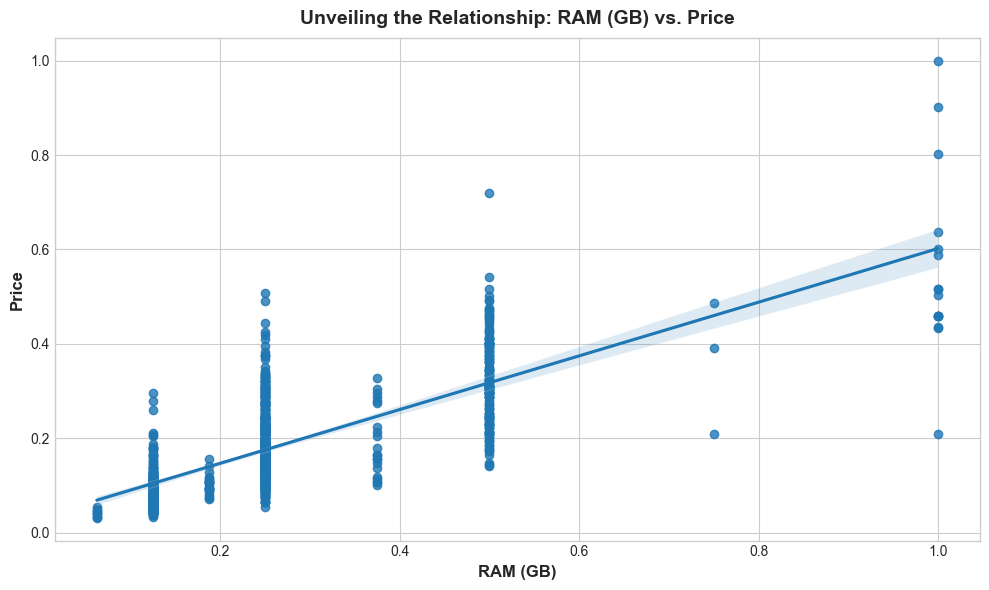

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(data=laptop_normalized, x='RAM (Normalized)', y='Price (Normalized)', ax=ax)
ax.set_title("Unveiling the Relationship: RAM (GB) vs. Price")
ax.set_xlabel('RAM (GB)')
ax.set_ylabel('Price')

plt.show()

The Regplot graph illustrates a positive relationship between laptop price and RAM capacity. As the RAM capacity increases, the price of laptops tends to increase as well. There are no outliers, indicating a consistent trend across the dataset. This suggests that higher RAM configurations are generally associated with higher-priced laptops, reflecting the importance of memory capacity in determining laptop prices.

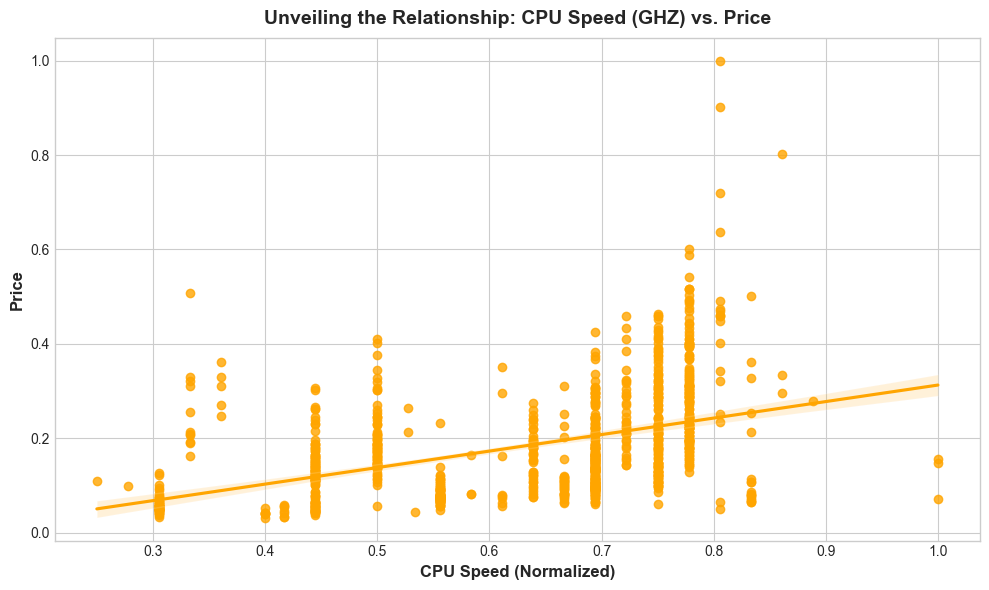

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(data=laptop_normalized, x='CPU Speed (Normalized)', y='Price (Normalized)', ax=ax, color="#FFA500")
ax.set_title("Unveiling the Relationship: CPU Speed (GHZ) vs. Price")
ax.set_xlabel('CPU Speed (Normalized)')
ax.set_ylabel('Price')

plt.show()

The regplot graph shows a positive relationship between laptop price and CPU speed (GHz). As CPU speed increases, the price of laptops tends to increase as well. The absence of a noticeable slope indicates a relatively linear relationship without a strong inclination in any particular direction. However, the presence of outliers suggests the existence of laptops with unusually high or low prices compared to the general trend.

In summary, the regplot graph demonstrates the positive correlation between laptop price and CPU speed, while also highlighting the presence of outliers that deviate from the expected relationship.

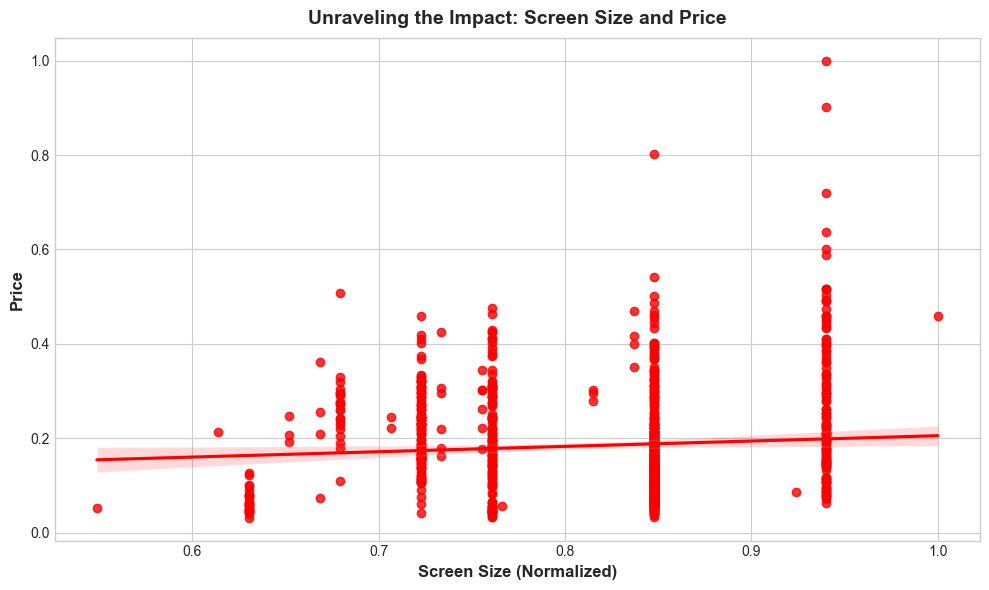

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(data=laptop_normalized, x='Screen (Normalized)', y='Price (Normalized)', ax=ax, color="#FF0000")
ax.set_title("Unraveling the Impact: Screen Size and Price")
ax.set_xlabel('Screen Size (Normalized)')
ax.set_ylabel('Price')

plt.show()

The regplot graph illustrates a positive relationship between laptop price and screen size (inches). As the screen size increases, the price of laptops tends to increase as well. The distribution appears to be positively skewed, but not excessively tilted, indicating a relatively moderate and nearly linear relationship between the two variables. While there is no significant inclination in any particular direction, the presence of outliers suggests the existence of laptops with unusually high or low prices compared to the overall trend.

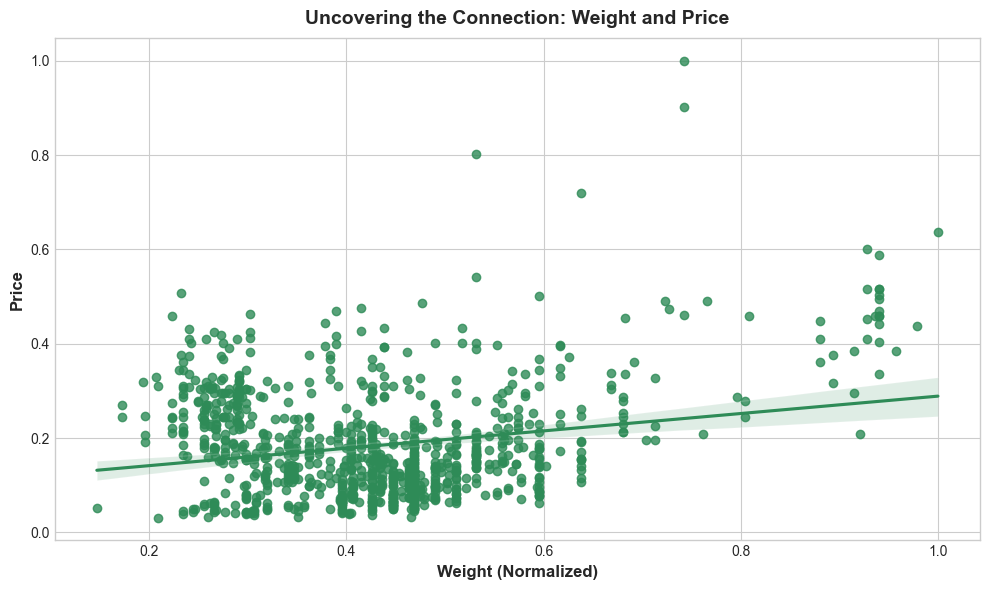

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(data=laptop_normalized, x='Weight (Normalized)', y='Price (Normalized)', ax=ax, color="#2E8B57")
ax.set_title("Uncovering the Connection: Weight and Price")
ax.set_xlabel('Weight (Normalized)')
ax.set_ylabel('Price')

plt.show()

The regplot graph illustrates a positive relationship between laptop price and weight (kg). As the weight of laptops increases, the price tends to increase as well. The distribution appears to be positively skewed but relatively close to a straight line, indicating a moderate and nearly linear relationship between the two variables. There is no significant inclination in any particular direction, suggesting a relatively balanced distribution of data points. However, the presence of widely scattered points indicates the presence of outliers, representing laptops with exceptionally high or low prices compared to the overall trend.

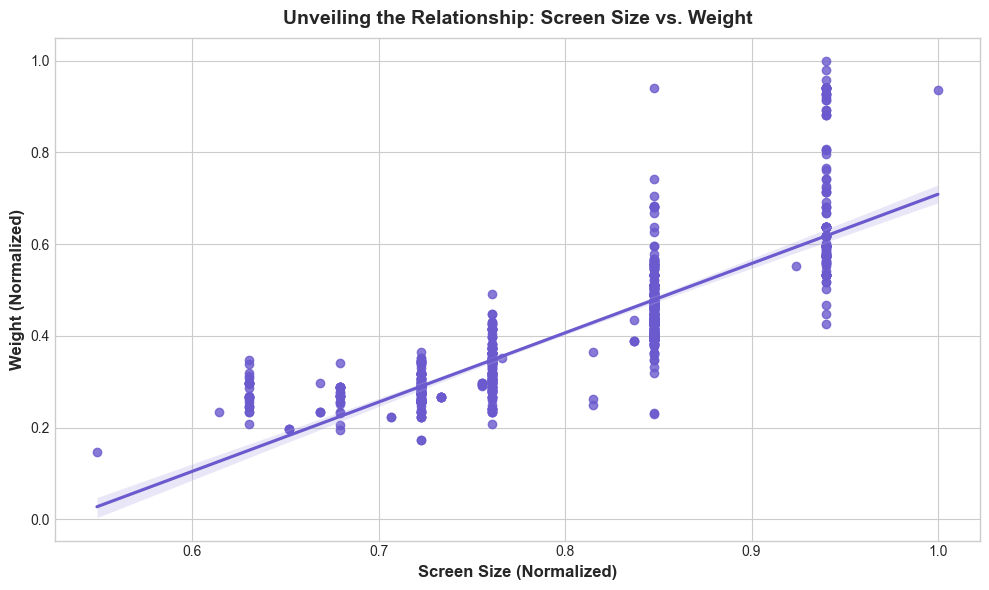

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(data=laptop_normalized, x='Screen (Normalized)', y='Weight (Normalized)', ax=ax, color="#6A5ACD")
ax.set_title("Unveiling the Relationship: Screen Size vs. Weight")
ax.set_xlabel('Screen Size (Normalized)')
ax.set_ylabel('Weight (Normalized)')

plt.show()

The regplot graph illustrates a positive relationship between the screen size (inches) and the weight (kg) of laptops. As the screen size increases, the weight tends to increase as well. The distribution appears to be positively skewed, with the line of best fit having a positive slope, indicating a general trend of heavier laptops with larger screen sizes. There is no significant inclination in any particular direction, suggesting a relatively balanced distribution of data points. However, the presence of outliers indicates the existence of laptops with screen sizes and weights that deviate significantly from the overall trend.

In [60]:
grouped_company_category = laptop.groupby(['company', 'category']).size().reset_index(name='counts')

fig = px.bar(grouped_company_category, x='company', y='counts', color='category', labels={'counts':'Number of Laptops'}, title="Exploring Laptop Counts by Company and Category", barmode='stack')
fig.update_layout(width=1600, height=1000)
fig.show()

The bar chart shows that the top five laptop companies, Dell, Lenovo, HP, ASUS, and Acer, produce laptops across various categories. However, other companies tend to focus on specific categories. For example, MSI specializes in gaming laptops, while Apple focuses solely on ultrabooks. This highlights the diversity in product offerings and strategies among laptop manufacturers, allowing consumers to choose from a wide range of options based on their preferences and needs.

In [61]:
fig = px.box(laptop, x='category', y='weight(kg)', color="category", title="Exploring Weight Distribution Across Laptop Categories")
fig.update_layout(width=750, height=600)
fig.show()

The box plot analysis reveals that gaming and workstation laptops tend to have higher weights compared to other categories. This can be attributed to their advanced hardware components and cooling systems required for demanding tasks. On the other hand, categories like 2-in-1 convertibles, netbooks, and ultrabooks showcase lighter weights, emphasizing portability. Notebooks fall in between, offering a balance between performance and weight. It's important to consider individual laptop models and configurations within each category, as well as ongoing advancements in technology driving lighter yet powerful laptops.

In [62]:
grouped_ram_category = laptop.groupby(['ram(GB)', 'category']).size().reset_index(name='counts')
grouped_ram_category['ram(GB)'] = grouped_ram_category['ram(GB)'].astype(str)

fig = px.bar(grouped_ram_category, x='ram(GB)', y='counts', color='category', labels={'counts':'Number of Laptops'}, title="Exploring Laptop Counts by RAM and Category", barmode='stack')

fig.update_layout(
    width=1000,
    height=800,
    xaxis=dict(
        tickmode='array',
        tickvals=grouped_ram_category['ram(GB)'].unique(),
        ticktext=grouped_ram_category['ram(GB)'].unique()
    )
)

fig.show()


The bar chart provides insights into the distribution of laptop counts based on categories and RAM sizes. In the 2-in-1 Convertible category, a variety of RAM sizes are observed, with 8GB being the most common. The 2-in-1 Convertible category offers flexibility and versatility for users who value the combination of a laptop and tablet functionality.

Gaming laptops predominantly feature higher RAM sizes, with 16GB and 8GB being the most prevalent configurations. This aligns with the demanding nature of gaming, where higher RAM capacities are beneficial for smooth gameplay and multitasking. Netbooks typically have smaller RAM sizes, with 4GB being the most common, followed by 8GB and 2GB. Netbooks are designed for basic computing tasks and portability, hence the focus on lower RAM capacities.

Notebooks, being a broad category, display a wide range of RAM sizes. 8GB and 4GB configurations are the most prevalent, indicating a balance between performance and affordability. However, higher RAM sizes like 16GB and 6GB are also present, catering to users with specific requirements. Ultrabooks primarily offer 8GB of RAM, followed by 16GB and 4GB options. Ultrabooks are known for their lightweight design and portability, making them suitable for professionals and individuals on the go. Workstation laptops, intended for intensive tasks such as professional video editing or 3D modeling, generally come with 8GB and 16GB RAM configurations. These higher RAM capacities ensure smooth performance when handling resource-intensive applications.

By examining the distribution of laptop counts across categories and RAM sizes, users can gain valuable insights into the prevalent configurations within each category. This information can guide their decision-making process when selecting a laptop that aligns with their specific requirements, whether it's for gaming, portability, or professional work.

In [63]:
laptop.groupby('cpu_brand')['cpu_speed(GHz)'].describe()

,count,mean,std,min,25%,50%,75%,max
cpu_brand,,,,,,,,
AMD,48.0,2.604167,0.550419,1.5,2.35,2.5,3.0,3.6
Intel,929.0,2.267492,0.517100,0.9,1.80,2.5,2.7,3.1


In [64]:
fig = px.box(laptop, x='cpu_brand', y='cpu_speed(GHz)', color="cpu_brand", title="Exploring CPU Speed Distribution by Brand")
fig.update_layout(width=750, height=600)
fig.show()

The boxplot visualization titled "Exploring CPU Speed Distribution by Brand" compares the distribution of CPU speeds between two laptop brands, AMD and Intel. It provides a clear overview of the range, central tendency, and outliers within each brand. By examining the boxes, whiskers, and median lines, we can understand the variation and tendencies in CPU speeds. The visualization indicates that AMD laptops generally have a wider range of CPU speeds compared to Intel laptops, with slightly higher median CPU speed. Outliers are present in both brands, suggesting the existence of laptops with exceptional CPU performance. Overall, this visualization helps us compare and understand the CPU speed distribution for AMD and Intel laptops, which can be valuable for making informed decisions about laptop purchases based on specific performance requirements.

Text(0.5, 1.0, 'Exploring Laptop Price Distribution by Category')

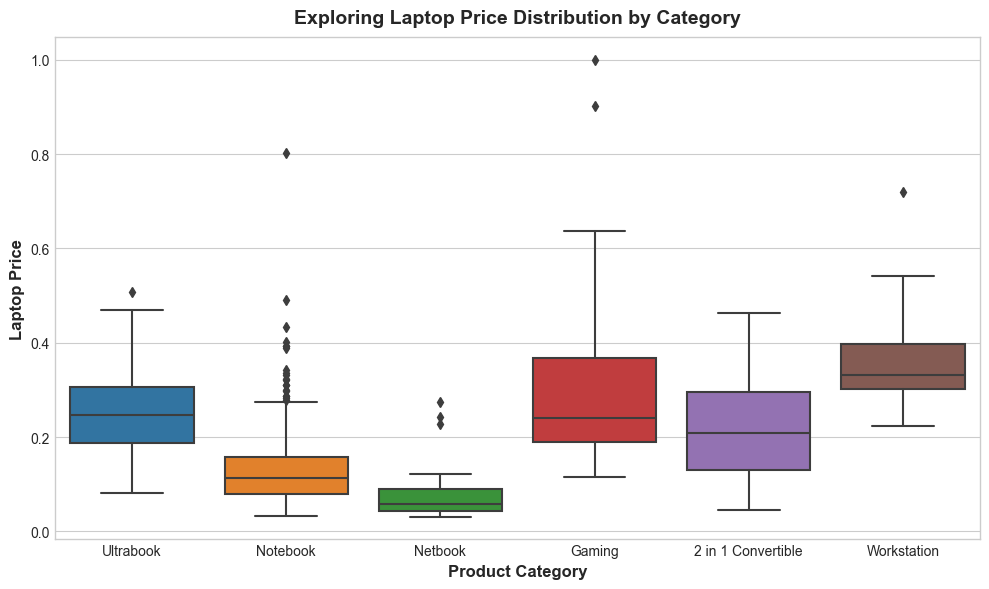

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop_normalized, x='category', y='Price (Normalized)')

plt.xlabel('Product Category')
plt.ylabel('Laptop Price')
plt.title('Exploring Laptop Price Distribution by Category')

The boxplot visualization titled "Exploring Laptop Price Distribution by Category" provides a concise overview of the price distribution across different laptop categories. It offers key insights into the range, central tendency, and outliers within each category. By examining the boxes, whiskers, and median lines, we can understand the variation and tendencies in laptop prices. The visualization reveals that each category has its own distinct price range. Workstations have the widest range, indicating a greater diversity of prices, while Netbooks have the narrowest range, suggesting a more concentrated price distribution. The median prices also vary between categories, with Workstations having the highest median and Netbooks having the lowest. Additionally, outliers are present in the Gaming and Workstation categories, suggesting the presence of laptops with exceptionally high prices. Overall, this visualization provides a helpful snapshot of the price distribution across laptop categories, allowing us to gain insights into the different price ranges and tendencies within each category.

In [66]:
laptop.groupby('category')['ram(GB)'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
2 in 1 Convertible,85.0,8.658824,3.908333,2.0,8.0,8.0,8.0,16.0
Gaming,150.0,14.133333,6.805709,4.0,8.0,16.0,16.0,32.0
Netbook,17.0,4.470588,1.806850,2.0,4.0,4.0,4.0,8.0
Notebook,549.0,6.644809,3.280037,2.0,4.0,8.0,8.0,32.0
Ultrabook,152.0,9.789474,4.112059,4.0,8.0,8.0,8.0,32.0
Workstation,24.0,11.000000,3.956283,8.0,8.0,8.0,16.0,16.0


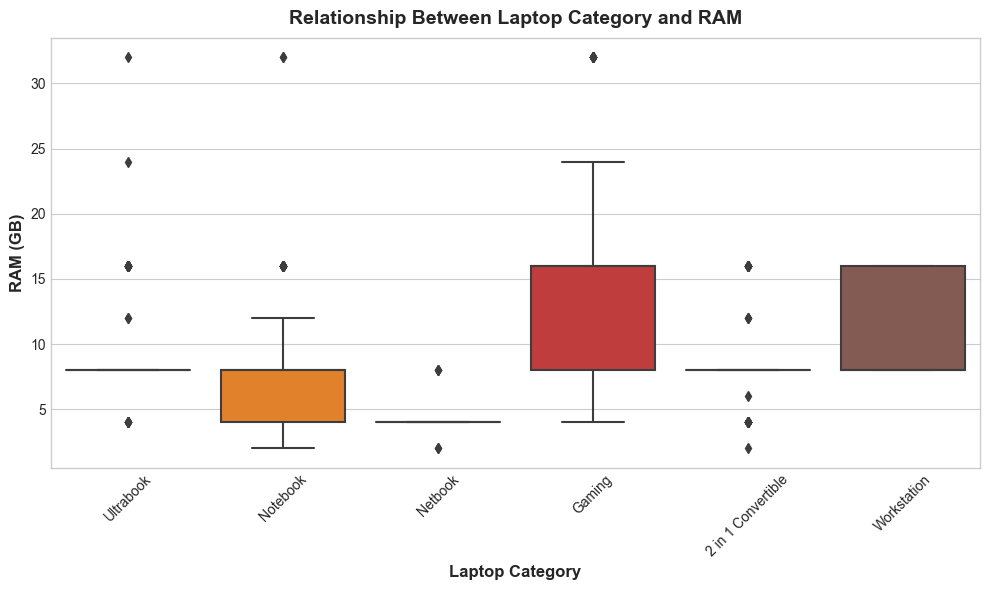

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop, x='category', y='ram(GB)')
plt.title('Relationship Between Laptop Category and RAM')
plt.xlabel('Laptop Category')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=45)

plt.show()

In [68]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            977 non-null    object 
 1   product            977 non-null    object 
 2   category           977 non-null    object 
 3   screen(inches)     977 non-null    float64
 4   ram(GB)            977 non-null    int64  
 5   gpu                977 non-null    object 
 6   os                 977 non-null    object 
 7   os_version         977 non-null    object 
 8   weight(kg)         977 non-null    float64
 9   price              977 non-null    float64
 10  resolution(pixel)  977 non-null    object 
 11  screentype         280 non-null    object 
 12  touchscreen        977 non-null    object 
 13  cpu_name           977 non-null    object 
 14  cpu_speed(GHz)     977 non-null    float64
 15  cpu_brand          977 non-null    object 
 16  storage_1(GB)      977 non

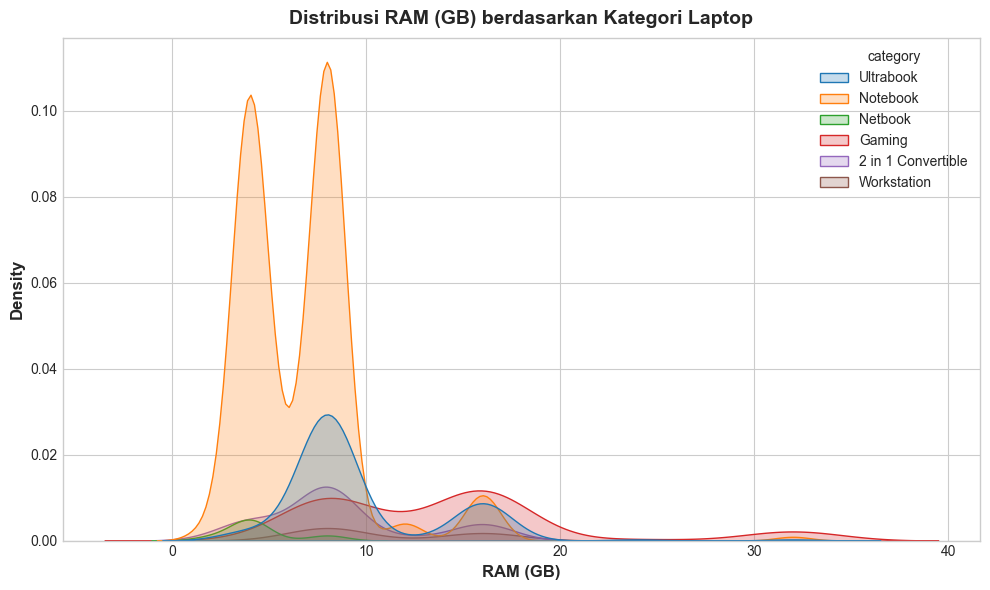

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=laptop, x="ram(GB)", hue="category", fill=True, ax=ax)
ax.set_title("Distribusi RAM (GB) berdasarkan Kategori Laptop")
ax.set_xlabel("RAM (GB)")
ax.set_ylabel("Density")

plt.show()

In [70]:
fig = px.box(laptop, x="cpu_brand", y="price", color="gpu_brand")
fig.update_layout(title="Comparison of Laptop Prices by CPU Brand and GPU Brand")
fig.update_layout(width = 750, height = 600)
fig.show()